## Train and test clustering model - Take 2

### Import libraries

In [95]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [96]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
from src.clustering import *
from src.classification import *

### Load data

In [97]:
# Load the data
df = pd.read_csv("../data/BankChurners_CleanedMapped.csv", index_col="ClientID")
df.head()

,Attrited,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,RelationshipPeriod_InMonths,TotalProductNo,MonthsInactive_Last12Months,ContactNo_Last12Months,CreditLimit,TotalRevolvingBalance_CC,OpenToBuyAve_Last12Months,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
ClientID,,,,,,,,,,,,,,,,,,,,
768805383,0,45,0,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,0,49,1,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,0,51,0,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,0,40,1,4,2,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,0,40,0,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Define some variables

In [98]:
column_names = list(df.columns)

### Reduce features w/ RF Classifier

In [99]:
X_train, X_test, y_train, y_test = clean_split_data(df, column_names)
X_train, X_test = scale_classification_data(X_train, X_test)

threshold = 0.02
important_features = fit_RF_classifier_and_reduce_features(X_train, y_train, column_names, threshold)
column_names_important_features = ["Attrited"] + list(important_features["Feature"])
df_reduced = df[column_names_important_features]
display(df_reduced.head())

,Attrited,TotalProductNo,MonthsInactive_Last12Months,ContactNo_Last12Months,TotalRevolvingBalance_CC,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
ClientID,,,,,,,,,,
768805383,0,5,1,3,777,1.335,1144,42,1.625,0.061
818770008,0,6,1,2,864,1.541,1291,33,3.714,0.105
713982108,0,4,1,0,0,2.594,1887,20,2.333,0.000
769911858,0,3,4,1,2517,1.405,1171,20,2.333,0.760
709106358,0,5,1,0,0,2.175,816,28,2.500,0.000


### Prepare data

In [100]:
# Target df
df_target = df[["Attrited"]]
# Features df
df_data = df.drop(["Attrited"], axis=1)
display(df_data.shape)
# Fautures (reduced) df
df_data_reduced = df_reduced.drop(["Attrited"], axis=1)
display(df_data_reduced.shape)

(10127, 19)

(10127, 9)

### Train clustering...

#### Find optimal number of clusters

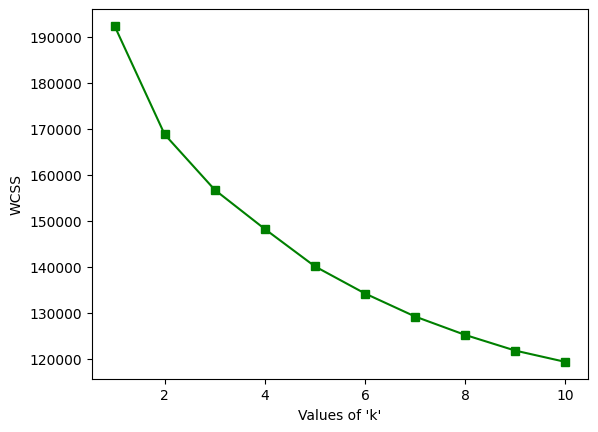

In [101]:
plot_elbow(df_data, False, True)
#plot_elbow(df_data, True, False)
#plot_elbow(df_data, False, False)

In [102]:
num_clusters = 5

#### ...with all features

In [103]:
model_all = train_kmeans(df_data, num_clusters, scale=False, zscore=False)

c:\Users\vital\Learning\GitHub\ChurnPrediction\_project_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


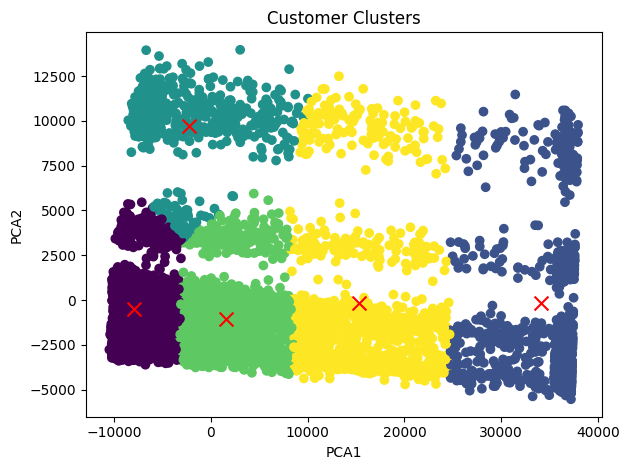

In [104]:
# plot results
df_data_pca, centers = apply_pca(df_data, model_all)
# Scatter plot
plot_clusters(df_data_pca, centers, model_all)

#### ...with reduced features

In [105]:
model_reduced = train_kmeans(df_data_reduced, num_clusters, scale=False, zscore=False)

c:\Users\vital\Learning\GitHub\ChurnPrediction\_project_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


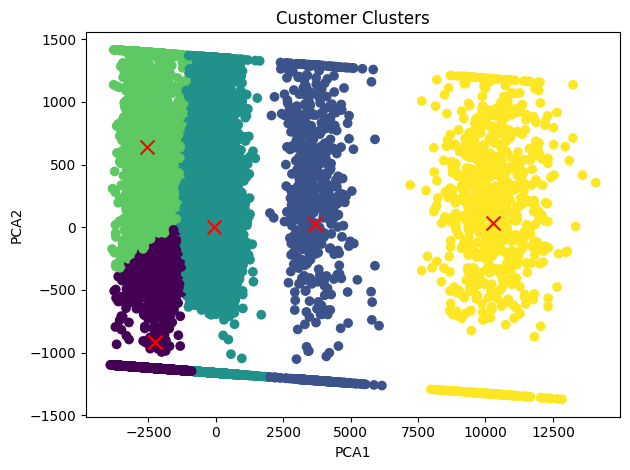

In [106]:
# plot results
df_data_reduced_pca, centers = apply_pca(df_data_reduced, model_reduced)
# Scatter plot
plot_clusters(df_data_reduced_pca, centers, model_reduced)